In [210]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canadaincome1/canda_income dataset.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [211]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split

In [212]:
my_data1=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [213]:
my_data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [214]:
features=['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea']


In [215]:
x=my_data1[features]
y=my_data1['SalePrice']


In [216]:
model=lm.LinearRegression()

In [217]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
test_data=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test_data1=test_data[features]
test_data1

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea
0,20,5,6,1961,1961,896,0,896,730.0
1,20,6,6,1958,1958,1329,0,1329,312.0
2,60,5,5,1997,1998,928,701,1629,482.0
3,60,6,6,1998,1998,926,678,1604,470.0
4,120,8,5,1992,1992,1280,0,1280,506.0
...,...,...,...,...,...,...,...,...,...
1454,160,4,7,1970,1970,546,546,1092,0.0
1455,160,4,5,1970,1970,546,546,1092,286.0
1456,20,5,7,1960,1996,1224,0,1224,576.0
1457,85,5,5,1992,1992,970,0,970,0.0


In [219]:
test_data1.GarageArea=test_data1.GarageArea.fillna(test_data1.GarageArea.median())
test_data1

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea
0,20,5,6,1961,1961,896,0,896,730.0
1,20,6,6,1958,1958,1329,0,1329,312.0
2,60,5,5,1997,1998,928,701,1629,482.0
3,60,6,6,1998,1998,926,678,1604,470.0
4,120,8,5,1992,1992,1280,0,1280,506.0
...,...,...,...,...,...,...,...,...,...
1454,160,4,7,1970,1970,546,546,1092,0.0
1455,160,4,5,1970,1970,546,546,1092,286.0
1456,20,5,7,1960,1996,1224,0,1224,576.0
1457,85,5,5,1992,1992,970,0,970,0.0


In [220]:
prediction=model.predict(test_data1)

In [221]:
prediction

array([129410.42820816, 164869.15238806, 168698.82157976, ...,
       158355.84849163, 108810.27138949, 235698.79089533])

In [222]:
model.coef_

array([ -155.92233535, 20738.36890359,  5052.92283203,   432.78401972,
         152.37163649,    53.08908837,    28.93408531,    23.61270919,
          40.03841171])

In [223]:
model.intercept_

-1246923.599589186

In [224]:
subdata = {'Id':  test_data.Id,
        'SalePrice': prediction
        }

In [225]:
submission=pd.DataFrame(subdata,columns=['Id','SalePrice'])

In [226]:
ytrainprediction=model.predict(my_data1[features])
ytrainprediction

array([218693.78699453, 186294.46436135, 225617.62859876, ...,
       240243.33233612, 124323.71668397, 141186.25903485])

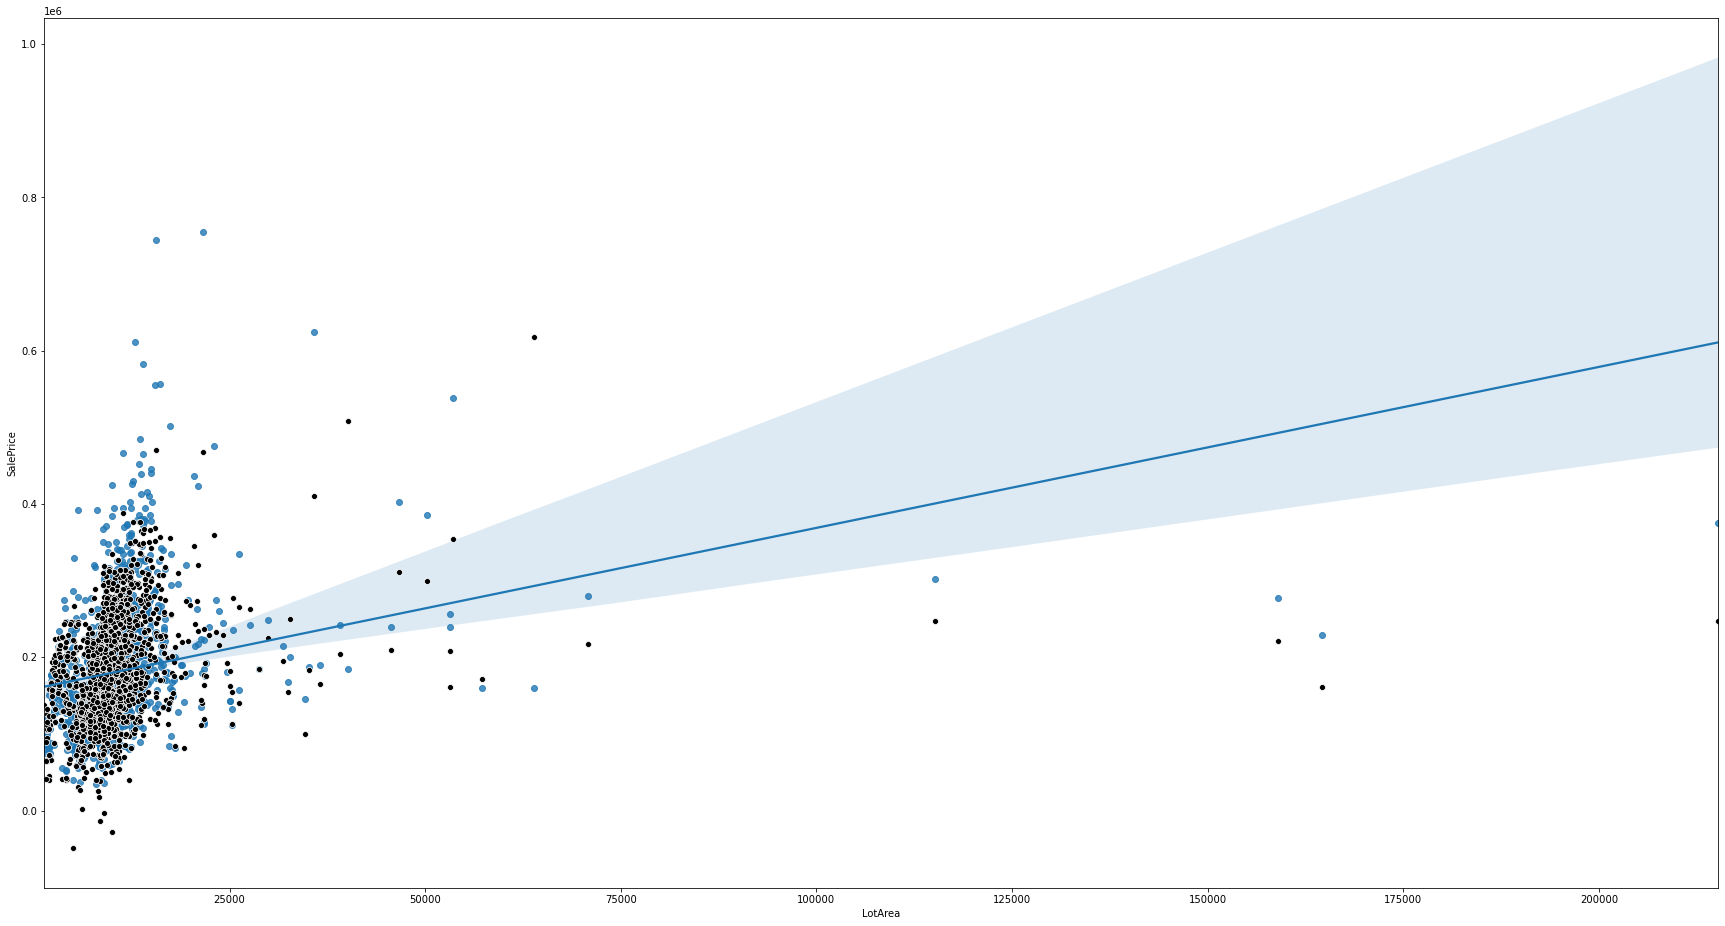

In [227]:
plt.figure(figsize=[30,16])
sns.regplot(x=my_data1['LotArea'],y=my_data1['SalePrice'])
sns.scatterplot(x=my_data1['LotArea'],y=ytrainprediction,color='black')

In [228]:
submission


,Id,SalePrice
0,1461,129410.428208
1,1462,164869.152388
2,1463,168698.821580
3,1464,193080.456526
4,1465,209605.089931
...,...,...
1454,2915,69779.136193
1455,2916,71124.276279
1456,2917,158355.848492
1457,2918,108810.271389


In [229]:
submission.to_csv("mysubmission.csv")